In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Set visualization style
sns.set(style='whitegrid')

In [5]:
# Load selected columns only
cols_to_use = [
    'Start_Time', 'Start_Lat', 'Start_Lng',
    'Weather_Condition', 'Severity',
    'Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
    'Wind_Speed(mph)', 'Precipitation(in)'
]

file_path = "C:/Users/Admin/Documents/US_Accidents_March23.csv"
df = pd.read_csv(file_path, usecols=cols_to_use, parse_dates=['Start_Time'])


In [6]:
# Force convert 'Start_Time' to datetime (will turn bad values into NaT)
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Now extract time features (after conversion)
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()


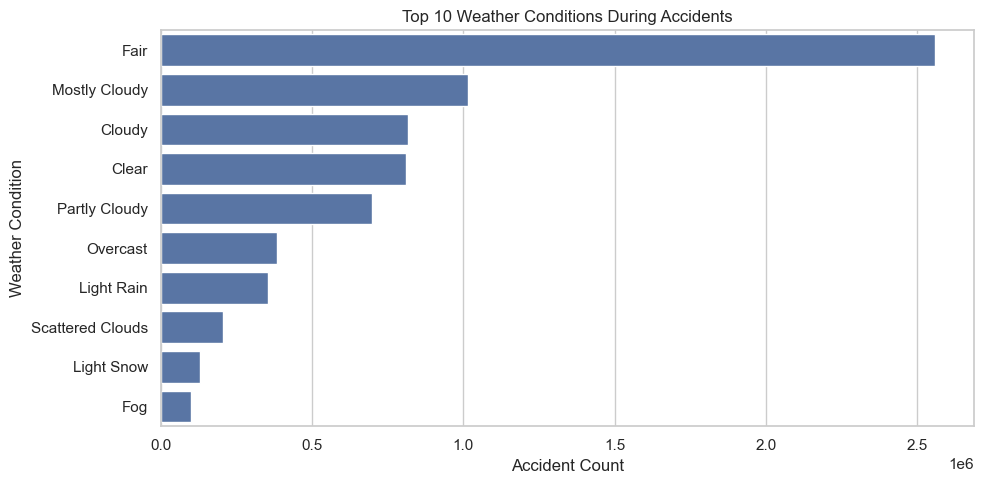

In [7]:
plt.figure(figsize=(10, 5))
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
sns.countplot(y='Weather_Condition', data=df[df['Weather_Condition'].isin(top_weather)], order=top_weather)
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Accident Count')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()


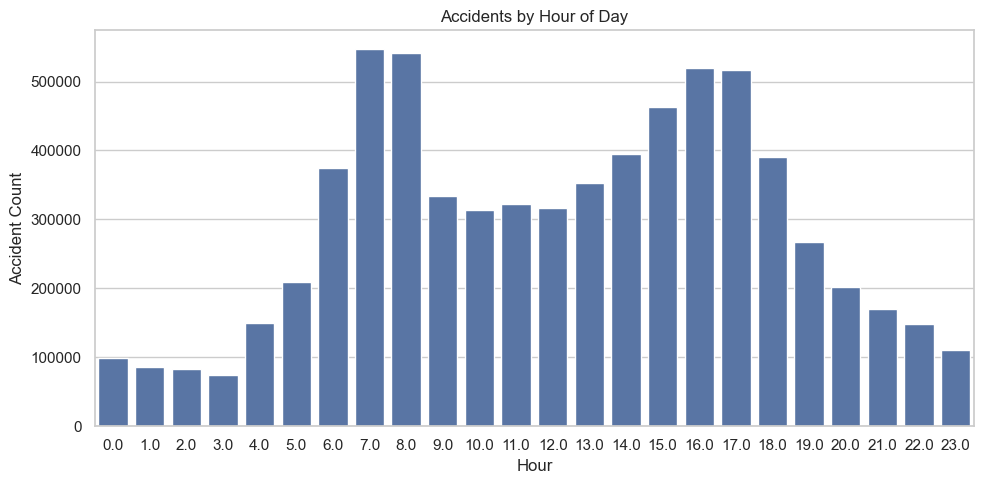

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()


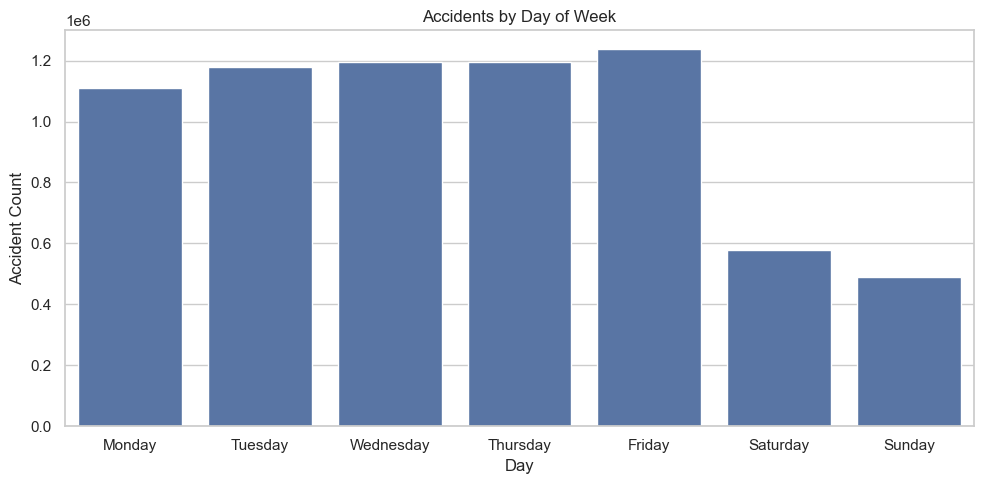

In [9]:
plt.figure(figsize=(10, 5))
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='DayOfWeek', data=df, order=days_order)
plt.title('Accidents by Day of Week')
plt.xlabel('Day')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()


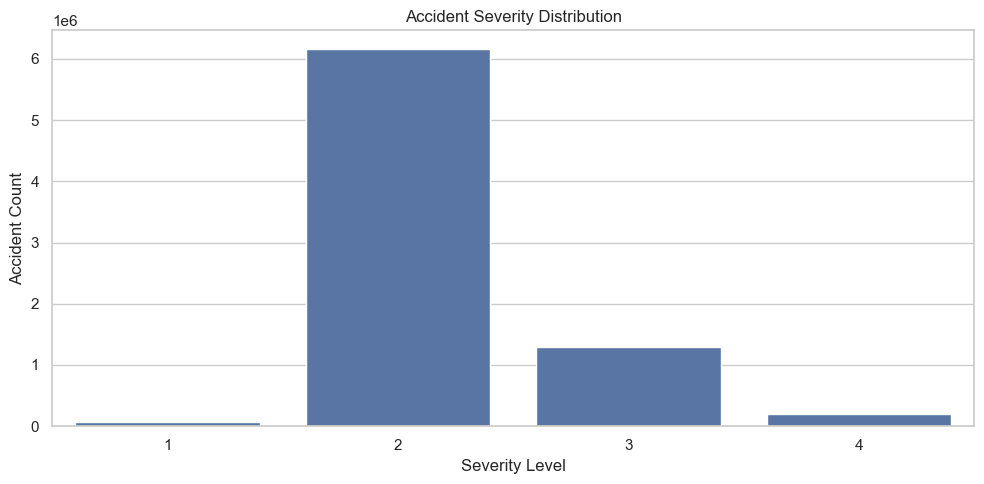

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Severity', data=df)
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()


In [11]:
# Drop rows with missing coordinates
df_map = df.dropna(subset=['Start_Lat', 'Start_Lng'])

# Sample 50,000 points max to avoid slowdown
df_sample = df_map.sample(n=50000, random_state=42)

# Create the base map
m = folium.Map(location=[39.5, -98.35], zoom_start=5)

# Add heatmap
heat_data = list(zip(df_sample['Start_Lat'], df_sample['Start_Lng']))
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

# Save map to HTML file
m.save('accident_hotspots.html')
print("Heatmap saved as 'accident_hotspots.html'")


Heatmap saved as 'accident_hotspots.html'
